In [14]:
%pip install scikit-learn

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 4.1 MB/s eta 0:00:00a 0:00:01
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import numpy as np

# สร้างช่วงวันที่ 365 วัน
date_range = pd.date_range(start="2024-01-01", periods=365, freq="D")

# สร้างแนวโน้มรายรับ (Revenue)
np.random.seed(42)
base_revenue = 50000 + 10000 * np.sin(np.linspace(0, 12, 365))  # ฤดูกาล
random_noise = np.random.randint(-5000, 5000, size=365)  # ความผันผวน
revenue = base_revenue + random_noise

# สร้างแนวโน้มรายจ่าย (Expense)
base_expense = revenue * np.random.uniform(0.5, 0.7)  # รายจ่ายประมาณ 50-70% ของรายรับ
random_expense_noise = np.random.randint(-3000, 3000, size=365)  # ความผันผวน
expense = base_expense + random_expense_noise

# สร้างตัวแปรฤดูกาล (Seasonality) โดยใช้ sin เพื่อสร้างคลื่นของฤดูกาล
season = np.sin(2 * np.pi * date_range.dayofyear / 365)  # ฤดูกาลจะอยู่ในช่วง -1 ถึง 1

# สร้างตัวแปรอีเวนต์ (Event) โดยการสุ่มว่าเป็นช่วง High Season หรือไม่
event = np.random.choice([0, 1], size=365, p=[0.8, 0.2])  # 80% ไม่มีอีเวนต์, 20% มีอีเวนต์

# สร้างตัวแปรอัตราการเข้าพัก (Occupancy Rate) โดยสุ่มค่า
occupancy_rate = np.random.uniform(0.5, 0.9, size=365)  # อัตราการเข้าพักระหว่าง 50% ถึง 90%
occupancy_rate = occupancy_rate.round(2)

# สร้าง DataFrame
df = pd.DataFrame({
    "date": date_range,
    "revenue": revenue.astype(int),
    "expense": expense.astype(int),
    "event": event,
    "occupancy_rate": occupancy_rate
})

# บันทึกเป็น CSV
file_path = "hotel_revenue_expense.csv"
df.to_csv(file_path, index=False)
file_path


'hotel_revenue_expense.csv'

In [22]:
import pandas as pd
import numpy as np

# สร้างช่วงวันที่ 365 วัน
date_range = pd.date_range(start="2024-01-01", periods=365, freq="D")

# สร้างฟังก์ชันเพื่อคำนวณการสุ่มรายรับ, รายจ่าย และอัตราการเข้าพักตามฤดูกาล
def generate_revenue_expense_occupancy(month):
    # กำหนดช่วงของรายรับในแต่ละฤดูกาล
    if month in [3, 4]:  # ฤดูร้อน (มี.ค. - เม.ย.)
        revenue = np.random.randint(400000, 500000)
        expense = np.random.randint(100000, 200000)
        occupancy_rate = np.random.uniform(0.5, 0.7)  # ต่ำ
    elif month in [5, 6, 7, 8, 9, 10]:  # ฤดูฝน (พ.ค. - ต.ค.)
        revenue = np.random.randint(500000, 600000)
        expense = np.random.randint(200000, 400000)
        occupancy_rate = np.random.uniform(0.7, 0.9)  # สูง
    elif month in [11, 12, 1, 2]:  # ฤดูหนาว (พ.ย. - ก.พ.)
        revenue = np.random.randint(500000, 600000)
        expense = np.random.randint(200000, 400000)
        occupancy_rate = np.random.uniform(0.7, 0.9)  # สูง
    else:
        revenue = np.random.randint(400000, 500000)
        expense = np.random.randint(100000, 200000)
        occupancy_rate = np.random.uniform(0.5, 0.7)  # ต่ำ
    
    return revenue, expense, occupancy_rate

# สร้างการสุ่มข้อมูลตามเดือน
revenues = []
expenses = []
occupancy_rates = []
events = []

for i, date in enumerate(date_range):
    month = date.month
    revenue, expense, occupancy_rate = generate_revenue_expense_occupancy(month)
    
    revenues.append(revenue)
    expenses.append(expense)
    occupancy_rates.append(round(occupancy_rate, 2))
    
    # สุ่มว่าเป็นช่วง High Season หรือไม่
    event = np.random.choice([0, 1], p=[0.8, 0.2])
    events.append(event)

# สร้าง DataFrame
df = pd.DataFrame({
    "date": date_range,
    "revenue": revenues,
    "expense": expenses,
    "event": events,
    "occupancy_rate": occupancy_rates
})

# บันทึกเป็น CSV
file_path = "hotel_revenue_expense.csv"
df.to_csv(file_path, index=False)

file_path


'hotel_revenue_expense.csv'

In [41]:
import os
import pandas as pd

# กำหนดโฟลเดอร์ที่เก็บไฟล์ CSV
folder_path = '/Users/theerat/Downloads/'

final_df = pd.DataFrame()

for month in ['ม.ค. 65', 'ก.พ. 65', 'มี.ค. 65', 'เม.ย. 65', 'พ.ค. 65', 'มิ.ย. 65', 'ก.ค. 65', 'ส.ค. 65', 'ก.ย. 65', 'ต.ค. 65', 'พ.ย. 65', 'ธ.ค. 65']:
    file_path = os.path.join(folder_path, f'ม่อนธารารีสอร์ทล่าสุด - {month}.csv')
    df = pd.read_csv(file_path)
    # print(f"Column names in {month}:", df.columns.tolist())
    df.loc[:, 'วันที่'] = pd.to_datetime(df['วันที่'], format='%d/%m/%y').dt.strftime('%d/%m/%Y')
    df.loc[:, 'accuracy'] = (df['จำนวนห้อง'] / 800 * 100).round(2)
    df_selected = df[['วันที่', 'จำนวนห้อง', 'accuracy']]
    final_df = pd.concat([final_df, df_selected], ignore_index=True)

print(final_df)
file_path = "booking_trend.csv"
final_df.to_csv(file_path, index=False)

         วันที่  จำนวนห้อง  accuracy
0    01/01/2022        8.0      1.00
1    02/01/2022        8.0      1.00
2    03/01/2022        3.0      0.38
3    04/01/2022        3.0      0.38
4    05/01/2022        0.0      0.00
..          ...        ...       ...
378  29/12/2022        4.0      0.50
379  30/12/2022        8.0      1.00
380  31/12/2022        8.0      1.00
381         NaN        NaN       NaN
382         NaN        NaN       NaN

[383 rows x 3 columns]


In [2]:
import pandas as pd
from datetime import datetime

# อ่านข้อมูลจาก CSV
df = pd.read_csv('booking_trend.csv')

# แปลงคอลัมน์วันที่เป็น datetime
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

# ตั้งวันที่เป็น index
df.set_index('date', inplace=True)

# ตรวจสอบข้อมูล
print(df.head())


            booking  accuracy
date                         
2022-01-01      8.0      1.00
2022-01-02      8.0      1.00
2022-01-03      3.0      0.38
2022-01-04      3.0      0.38
2022-01-05      0.0      0.00


In [3]:
# คำนวณค่าเฉลี่ยของจำนวนห้องที่จองในแต่ละเดือน
monthly_avg_rooms = df.resample('M').mean()['booking']
print("ค่าเฉลี่ยจำนวนห้องที่จองในแต่ละเดือน:")
print(monthly_avg_rooms)


ค่าเฉลี่ยจำนวนห้องที่จองในแต่ละเดือน:
date
2022-01-31    1.709677
2022-02-28    0.214286
2022-03-31    0.193548
2022-04-30    0.600000
2022-05-31    0.290323
2022-06-30    0.000000
2022-07-31    0.290323
2022-08-31    0.193548
2022-09-30    0.000000
2022-10-31    0.580645
2022-11-30    0.500000
2022-12-31    1.161290
Freq: ME, Name: booking, dtype: float64


/var/folders/t_/x6hdnsfd5sq7sg9rvkbfth5h0000gn/T/ipykernel_25369/1485780768.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_rooms = df.resample('M').mean()['booking']


Revenue Planning and Dynamic Pricing Strategy Report

Projected Monthly Revenue:
        month  estimated_revenue  target_revenue
4     January          116337.30      127971.030
3    February           53144.62       58459.082
7       March           39127.92       43040.712
0       April          293392.17      322731.387
8         May          136578.32      150236.152
6        June           49102.24       54012.464
5        July          134227.85      147650.635
1      August           97464.69      107211.159
11  September           62789.15       69068.065
10    October          354130.57      389543.627
9    November          321788.12      353966.932
2    December          607903.44      668693.784

Projected Annual Revenue: 2,265,986.39 THB
Annual Revenue Target: 2,492,585.03 THB

Promotion Plan for Low Occupancy Periods:
       month  occupancy_rate         promotion_type  discount_percentage  \
0    January       12.370323    Early Bird Discount                   15   
1  

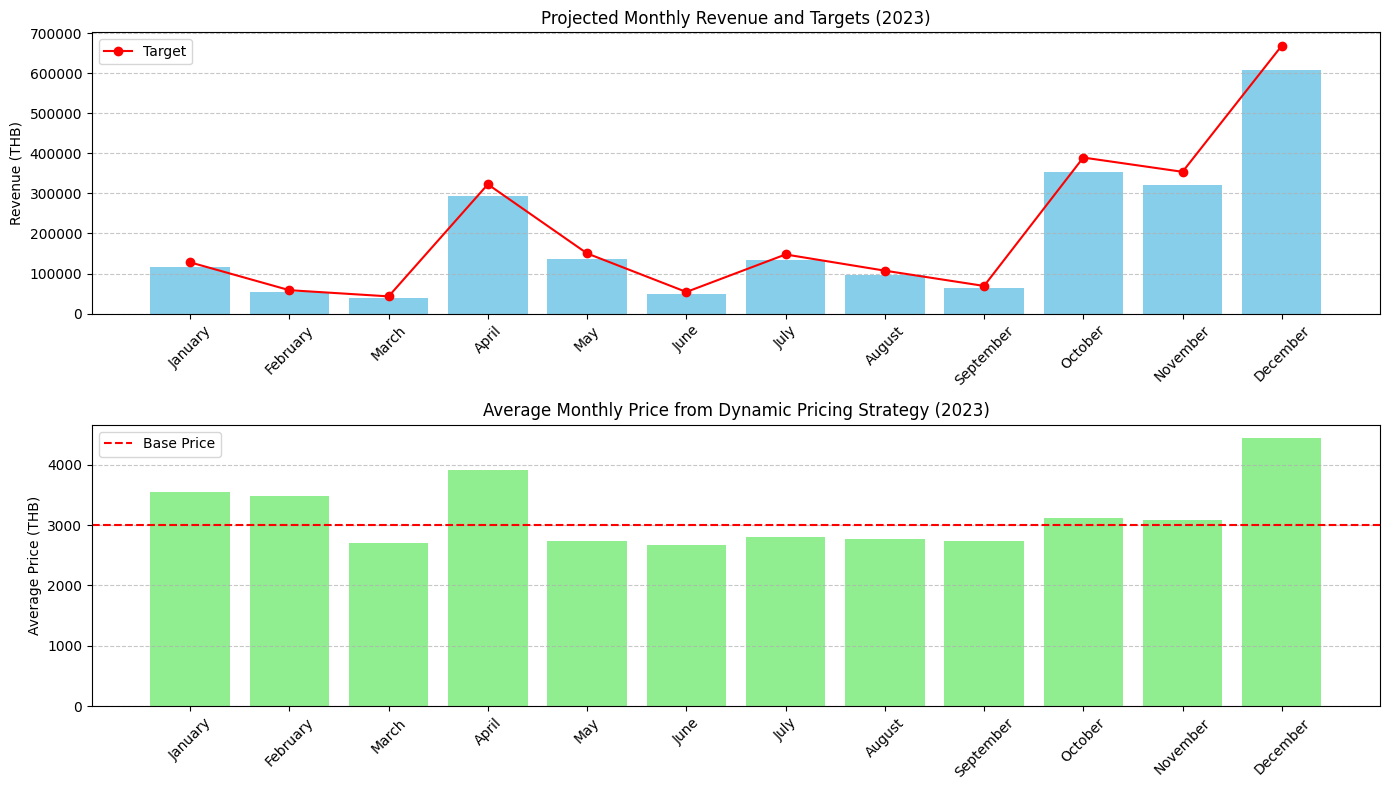

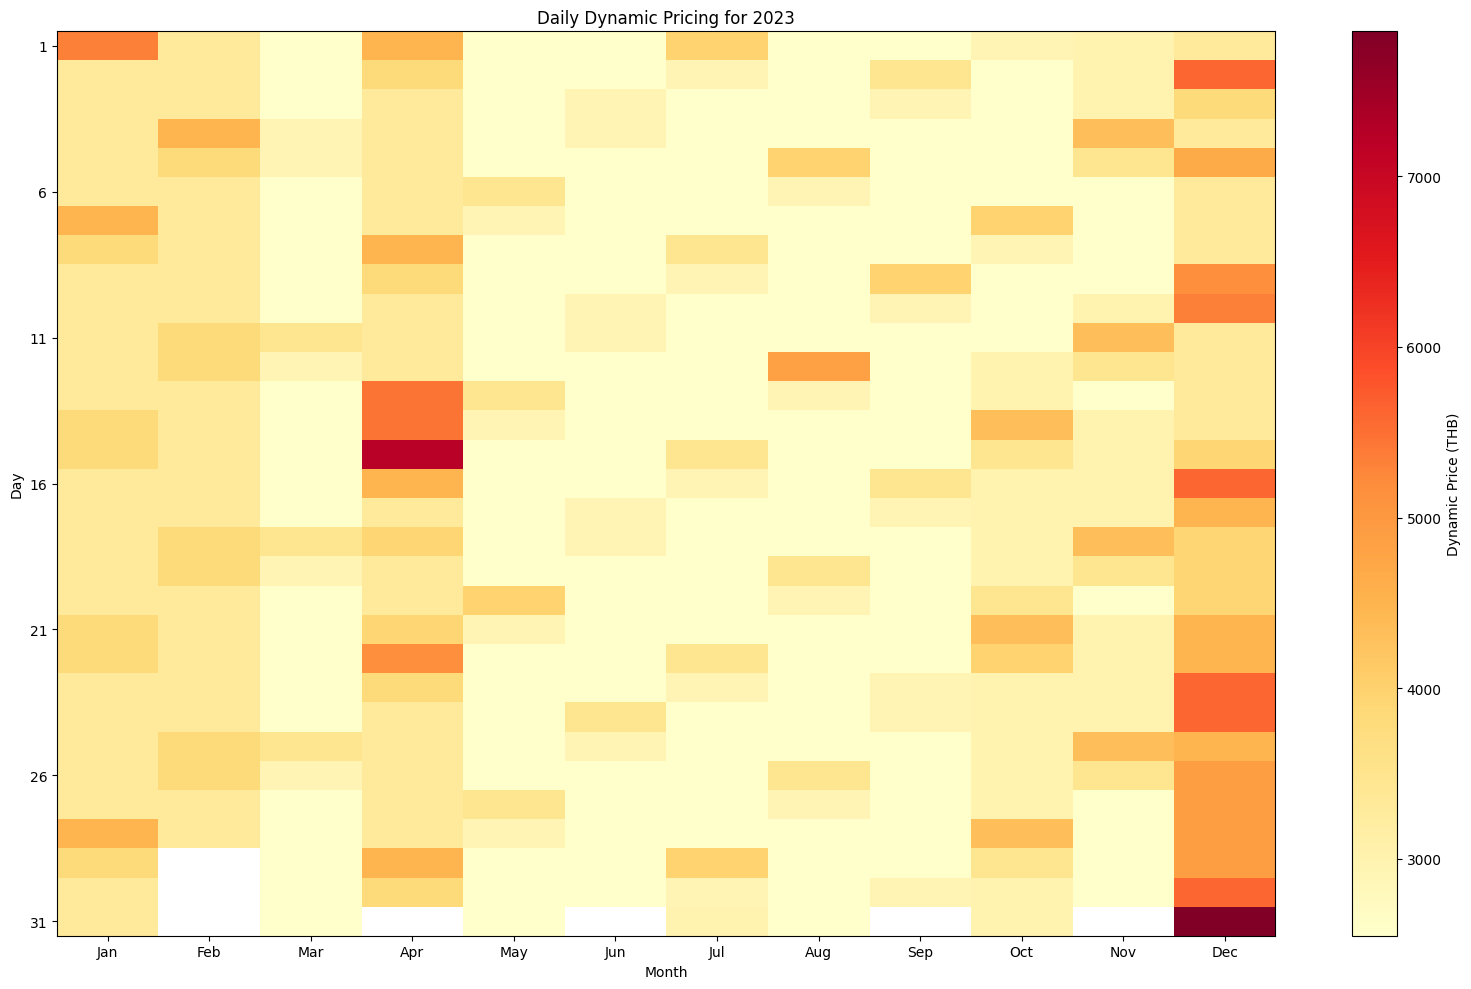

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

# 1. Load the saved forecast data
forecast_daily = pd.read_csv('booking_forecast_daily_2023.csv')
forecast_monthly = pd.read_csv('booking_forecast_monthly_2023.csv')

# Convert date column to datetime format
forecast_daily['ds'] = pd.to_datetime(forecast_daily['ds'])

# Add month and day of week columns
forecast_daily['month'] = forecast_daily['ds'].dt.month_name()
forecast_daily['day_of_week'] = forecast_daily['ds'].dt.day_name()
forecast_daily['is_weekend'] = forecast_daily['day_of_week'].isin(['Saturday', 'Sunday'])

# Add columns for Thai holidays (example - you may need to add other holidays)
thai_holidays = {
    '2023-01-01': 'New Year\'s Day',
    '2023-04-13': 'Songkran',
    '2023-04-14': 'Songkran',
    '2023-04-15': 'Songkran',
    # '2023-05-01': 'Labor Day',
    # '2023-05-04': 'Coronation Day',
    # '2023-06-03': 'Queen\'s Birthday',
    # '2023-07-28': 'King\'s Birthday',
    '2023-08-12': 'Mother\'s Day',
    # '2023-10-13': 'King Rama IX Memorial Day',
    '2023-12-05': 'Father\'s Day',
    '2023-12-10': 'Constitution Day',
    '2023-12-31': 'New Year\'s Eve'
}

# Convert holidays to datetime format
thai_holidays_dates = {pd.to_datetime(date): holiday for date, holiday in thai_holidays.items()}

# Add holiday columns
forecast_daily['is_holiday'] = forecast_daily['ds'].apply(lambda x: x in thai_holidays_dates)
forecast_daily['holiday_name'] = forecast_daily['ds'].apply(lambda x: thai_holidays_dates.get(x, ''))

# Create function to define high season (example - adjust according to your business)
def is_high_season(date):
    month = date.month
    # Assume high season is Dec-Feb and Apr
    if month in [12, 1, 2, 4]:
        return True
    return False

forecast_daily['is_high_season'] = forecast_daily['ds'].apply(is_high_season)

# Set base price per room
base_price = 3000  # THB per room

# 2. Dynamic price calculation
def calculate_dynamic_price(row):
    price = base_price
    
    # Adjust price based on season
    if row['is_high_season']:
        price *= 1.3  # Increase price by 30% during high season
    
    # Adjust price based on weekend
    if row['is_weekend']:
        price *= 1.15  # Increase price by 15% on weekends
    
    # Adjust price based on holidays
    if row['is_holiday']:
        price *= 1.4  # Increase price by 40% on holidays
    
    # Adjust price based on booking rate (Demand-based pricing)
    occupancy_rate = row['occupancy_rate_rounded']
    
    if occupancy_rate > 80:
        price *= 1.25  # Increase price by 25% when booking rate is very high
    elif occupancy_rate > 60:
        price *= 1.15  # Increase price by 15% when booking rate is high
    elif occupancy_rate < 30:
        price *= 0.85  # Decrease price by 15% when booking rate is low
    elif occupancy_rate < 15:
        price *= 0.75  # Decrease price by 25% when booking rate is very low
    
    return round(price)

# Calculate dynamic prices
forecast_daily['dynamic_price'] = forecast_daily.apply(calculate_dynamic_price, axis=1)

# 3. Calculate projected revenue
forecast_daily['estimated_revenue'] = forecast_daily['yhat_rounded'] * forecast_daily['dynamic_price']

# Calculate monthly revenue
monthly_revenue = forecast_daily.groupby('month').agg({
    'estimated_revenue': 'sum',
    'yhat_rounded': 'mean',
    'dynamic_price': 'mean'
}).reset_index()

# Sort months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_revenue['month'] = pd.Categorical(monthly_revenue['month'], categories=month_order, ordered=True)
monthly_revenue = monthly_revenue.sort_values('month')

# 4. Set financial targets
# Calculate target revenue from projected revenue plus 10%
total_yearly_revenue = monthly_revenue['estimated_revenue'].sum()
target_yearly_revenue = total_yearly_revenue * 1.1  # Target 10% higher than forecast

# Set monthly targets based on the proportion of projected revenue
monthly_revenue['revenue_proportion'] = monthly_revenue['estimated_revenue'] / total_yearly_revenue
monthly_revenue['target_revenue'] = monthly_revenue['revenue_proportion'] * target_yearly_revenue

# 5. Create promotion plan for periods with low booking rates
# Check if 'month' exists in forecast_monthly
if 'month' not in forecast_monthly.columns and 'ds' in forecast_monthly.columns:
    forecast_monthly['ds'] = pd.to_datetime(forecast_monthly['ds'])
    forecast_monthly['month'] = forecast_monthly['ds'].dt.month_name()

# Filter data for months with low booking rates
low_occupancy_df = forecast_monthly[forecast_monthly['occupancy_rate_rounded'] < 40]
num_months = len(low_occupancy_df)

if num_months > 0:
    # Create lists for promotion plan
    promotion_types = ['Early Bird Discount', 'Stay 3 Pay 2', 'Free Breakfast', 'Free Airport Transfer'] * (num_months // 4 + 1)
    discount_percentages = [15, 33, 10, 5] * (num_months // 4 + 1)
    booking_increases = [20, 25, 15, 10] * (num_months // 4 + 1)
    
    # Create DataFrame for promotion plan
    promotion_plan = pd.DataFrame({
        'month': low_occupancy_df['month'].values,
        'occupancy_rate': low_occupancy_df['occupancy_rate_rounded'].values,
        'promotion_type': promotion_types[:num_months],
        'discount_percentage': discount_percentages[:num_months],
        'estimated_booking_increase': booking_increases[:num_months]
    })
else:
    # Create empty DataFrame if there are no months with low booking rates
    promotion_plan = pd.DataFrame(columns=[
        'month', 'occupancy_rate', 'promotion_type',
        'discount_percentage', 'estimated_booking_increase'
    ])

# 6. Create financial reports and analysis
print("="*50)
print("Revenue Planning and Dynamic Pricing Strategy Report")
print("="*50)

print("\nProjected Monthly Revenue:")
print(monthly_revenue[['month', 'estimated_revenue', 'target_revenue']])

print(f"\nProjected Annual Revenue: {total_yearly_revenue:,.2f} THB")
print(f"Annual Revenue Target: {target_yearly_revenue:,.2f} THB")

print("\nPromotion Plan for Low Occupancy Periods:")
print(promotion_plan)

# 7. Create graphs and visualizations
plt.figure(figsize=(14, 8))

# Monthly revenue graph
plt.subplot(2, 1, 1)
plt.bar(monthly_revenue['month'], monthly_revenue['estimated_revenue'], color='skyblue')
plt.plot(monthly_revenue['month'], monthly_revenue['target_revenue'], 'ro-', label='Target')
plt.title('Projected Monthly Revenue and Targets (2023)')
plt.ylabel('Revenue (THB)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Average monthly price graph
plt.subplot(2, 1, 2)
plt.bar(monthly_revenue['month'], monthly_revenue['dynamic_price'], color='lightgreen')
plt.axhline(y=base_price, color='r', linestyle='--', label='Base Price')
plt.title('Average Monthly Price from Dynamic Pricing Strategy (2023)')
plt.ylabel('Average Price (THB)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('revenue_planning_2023.png')

# 8. Show daily dynamic pricing graph (Heatmap)
plt.figure(figsize=(16, 10))

# Create data for heatmap
pivot_price = forecast_daily.copy()
pivot_price['day'] = pivot_price['ds'].dt.day
pivot_price['month_num'] = pivot_price['ds'].dt.month

# Create daily price table by month
heatmap_price = pivot_price.pivot_table(
    index='day', 
    columns='month_num', 
    values='dynamic_price', 
    aggfunc='mean',
    fill_value=np.nan
)

# Use masked array technique to hide NaN values in the display
mask = np.isnan(heatmap_price.values)
masked_price_data = np.ma.masked_array(heatmap_price.values, mask)

# Create heatmap
plt.imshow(masked_price_data, cmap='YlOrRd', aspect='auto')
plt.colorbar(label='Dynamic Price (THB)')
plt.title('Daily Dynamic Pricing for 2023')
plt.xlabel('Month')
plt.ylabel('Day')
plt.xticks(np.arange(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.yticks(np.arange(0, 31, 5), np.arange(1, 32, 5))
plt.tight_layout()
plt.savefig('dynamic_pricing_heatmap_2023.png')

# 9. Save data for future use
forecast_daily[['ds', 'yhat_rounded', 'occupancy_rate_rounded', 'dynamic_price', 'estimated_revenue']].to_csv(
    'financial_forecast_daily_2023.csv', index=False)

monthly_revenue.to_csv('financial_forecast_monthly_2023.csv', index=False)
promotion_plan.to_csv('promotion_plan_2023.csv', index=False)

print("\nData and graphs have been saved successfully")
print("financial_forecast_daily_2023.csv - Daily financial data")
print("financial_forecast_monthly_2023.csv - Monthly financial data")
print("promotion_plan_2023.csv - Promotion plan")
print("revenue_planning_2023.png - Revenue and average price graphs")
print("dynamic_pricing_heatmap_2023.png - Dynamic pricing heatmap")

In [13]:
%pip install --upgrade statsmodels


Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from prophet import Prophet
import plotly.express as px
import plotly.graph_objects as go
from statsmodels import tsa

In [7]:
def load_financial_data(file_path):
    """โหลดข้อมูลการเงินจาก CSV หรือ Excel"""
    if file_path.endswith('.csv'):
        df = pd.read_csv(file_path)
    else:
        df = pd.read_excel(file_path)
    
    # แปลงคอลัมน์วันที่เป็น datetime
    df['date'] = pd.to_datetime(df['date'])
    return df

In [8]:
def calculate_expense_ratio(df):
    """คำนวณอัตราส่วนรายจ่ายต่อรายได้"""
    df['expense_ratio'] = df['expense'] / df['revenue']
    return df

In [9]:
def analyze_expenses_by_time(df):
    """วิเคราะห์รายจ่ายตามช่วงเวลาต่างๆ (วัน, สัปดาห์, เดือน, ปี)"""
    # สร้างคอลัมน์เพิ่มเติมสำหรับการวิเคราะห์
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['week'] = df['date'].dt.isocalendar().week
    df['day_of_week'] = df['date'].dt.dayofweek
    
    # วิเคราะห์รายเดือน
    monthly_expense = df.groupby(['year', 'month']).agg({
        'revenue': 'sum',
        'expense': 'sum'
    }).reset_index()
    
    monthly_expense['expense_ratio'] = monthly_expense['expense'] / monthly_expense['revenue']
    monthly_expense['date'] = pd.to_datetime(monthly_expense[['year', 'month']].assign(day=1))
    
    return monthly_expense

In [10]:
def detect_anomalies(df):
    """ใช้ Isolation Forest เพื่อตรวจจับรายจ่ายที่ผิดปกติ"""
    # เตรียมข้อมูลสำหรับโมเดล
    X = df[['expense_ratio']].values
    
    # สร้างและเทรนโมเดล
    model = IsolationForest(contamination=0.05, random_state=42)
    df['anomaly'] = model.fit_predict(X)
    
    # แปลงค่า (-1 คือ anomaly, 1 คือ normal) เป็น boolean
    df['is_anomaly'] = df['anomaly'] == -1
    
    return df

In [11]:
def forecast_with_prophet(df):
    """ใช้ Prophet วิเคราะห์และพยากรณ์รายจ่ายในอนาคต"""
    # เตรียมข้อมูลสำหรับ Prophet
    prophet_df = df[['date', 'expense_ratio']].rename(columns={
        'date': 'ds',
        'expense_ratio': 'y'
    })
    
    # สร้างและเทรนโมเดล
    model = Prophet(yearly_seasonality=True, weekly_seasonality=True)
    model.fit(prophet_df)
    
    # สร้างช่วงเวลาสำหรับการพยากรณ์ (90 วันข้างหน้า)
    future = model.make_future_dataframe(periods=90)
    
    # พยากรณ์
    forecast = model.predict(future)
    
    # แยกองค์ประกอบของ time series
    components = model.plot_components(forecast)
    
    return forecast, components

In [12]:
def analyze_expenses_by_category(df):
    """วิเคราะห์รายจ่ายแยกตามหมวดหมู่"""
    # รวมยอดรายจ่ายตามหมวดหมู่และเดือน
    category_expense = df.groupby(['year', 'month', 'expense_category']).agg({
        'expense': 'sum'
    }).reset_index()
    
    # เพิ่มคอลัมน์วันที่สำหรับการพล็อต
    category_expense['date'] = pd.to_datetime(category_expense[['year', 'month']].assign(day=1))
    
    return category_expense

In [13]:
def create_expense_dashboard(monthly_data, category_data, anomalies_data, forecast_data):
    """สร้างแดชบอร์ดเพื่อแสดงผลการวิเคราะห์รายจ่าย"""
    # สร้างรูปภาพด้วย Plotly
    fig = go.Figure()
    
    # 1. กราฟแสดงรายรับรายจ่ายรายเดือน
    fig1 = px.line(monthly_data, x='date', y=['revenue', 'expense'], 
                  title='รายรับและรายจ่ายรายเดือน',
                  labels={'value': 'จำนวนเงิน (บาท)', 'date': 'วันที่', 'variable': 'ประเภท'})
    
    # 2. กราฟแสดงอัตราส่วนรายจ่ายต่อรายได้ และไฮไลท์ช่วงที่ผิดปกติ
    fig2 = px.line(anomalies_data, x='date', y='expense_ratio', 
                  title='อัตราส่วนรายจ่ายต่อรายได้',
                  labels={'expense_ratio': 'รายจ่าย/รายได้', 'date': 'วันที่'})
    
    # เพิ่มจุดสีแดงสำหรับค่าผิดปกติ
    anomaly_points = anomalies_data[anomalies_data['is_anomaly']]
    fig2.add_scatter(x=anomaly_points['date'], y=anomaly_points['expense_ratio'],
                    mode='markers', marker=dict(color='red', size=10),
                    name='รายจ่ายผิดปกติ')
    
    # 3. กราฟแสดงรายจ่ายตามหมวดหมู่
    fig3 = px.area(category_data, x='date', y='expense', color='expense_category',
                  title='รายจ่ายตามหมวดหมู่',
                  labels={'expense': 'รายจ่าย (บาท)', 'date': 'วันที่', 'expense_category': 'หมวดหมู่'})
    
    # 4. กราฟแสดงการพยากรณ์รายจ่ายในอนาคต
    fig4 = go.Figure()
    fig4.add_trace(go.Scatter(x=forecast_data['ds'], y=forecast_data['yhat'],
                             mode='lines', name='พยากรณ์',
                             line=dict(color='blue')))
    fig4.add_trace(go.Scatter(x=forecast_data['ds'], y=forecast_data['yhat_upper'],
                             mode='lines', name='ขอบบน',
                             line=dict(color='rgba(0,0,255,0.2)', width=0)))
    fig4.add_trace(go.Scatter(x=forecast_data['ds'], y=forecast_data['yhat_lower'],
                             mode='lines', name='ขอบล่าง',
                             line=dict(color='rgba(0,0,255,0.2)', width=0),
                             fill='tonexty'))
    fig4.update_layout(title='พยากรณ์อัตราส่วนรายจ่ายต่อรายได้ 90 วันข้างหน้า',
                      xaxis_title='วันที่',
                      yaxis_title='รายจ่าย/รายได้')
    
    return fig1, fig2, fig3, fig4

In [14]:
def generate_expense_report(anomalies_data, category_data):
    """สร้างรายงานสรุปช่วงเวลาที่มีรายจ่ายสูงเกินไปพร้อมวิเคราะห์สาเหตุ"""
    # กรองเฉพาะช่วงที่มีค่าผิดปกติ
    high_expense_periods = anomalies_data[anomalies_data['is_anomaly']].copy()
    
    # เรียงลำดับตามอัตราส่วนรายจ่ายต่อรายได้จากมากไปน้อย
    high_expense_periods.sort_values(by='expense_ratio', ascending=False, inplace=True)
    
    # สร้างรายงาน
    report = []
    for _, period in high_expense_periods.iterrows():
        # หาหมวดหมู่รายจ่ายที่สูงที่สุดในช่วงเวลานั้น
        period_start = pd.to_datetime(f"{int(period['year'])}-{int(period['month'])}-01")
        period_end = period_start + pd.offsets.MonthEnd(1)
        
        period_categories = category_data[
            (category_data['date'] >= period_start) & 
            (category_data['date'] <= period_end)
        ].sort_values(by='expense', ascending=False)
        
        top_categories = period_categories.head(3)
        
        report.append({
            'period': period_start.strftime('%B %Y'),
            'expense_ratio': period['expense_ratio'],
            'total_expense': period['expense'],
            'total_revenue': period['revenue'],
            'top_expense_categories': top_categories['expense_category'].tolist(),
            'category_amounts': top_categories['expense'].tolist()
        })
    
    return report

22:29:59 - cmdstanpy - INFO - Chain [1] start processing
22:30:04 - cmdstanpy - INFO - Chain [1] done processing


== ช่วงเวลาที่มีรายจ่ายสูงเกินไป ==

ช่วงเวลา: July 2022
อัตราส่วนรายจ่ายต่อรายได้: 0.77
รายจ่ายรวม: 2,634,313.56 บาท
รายได้รวม: 3,420,016.34 บาท
หมวดหมู่รายจ่ายสูงสุด:
  - Staff: 938,079.31 บาท
  - Utilities: 524,888.25 บาท
  - Maintenance: 392,409.45 บาท


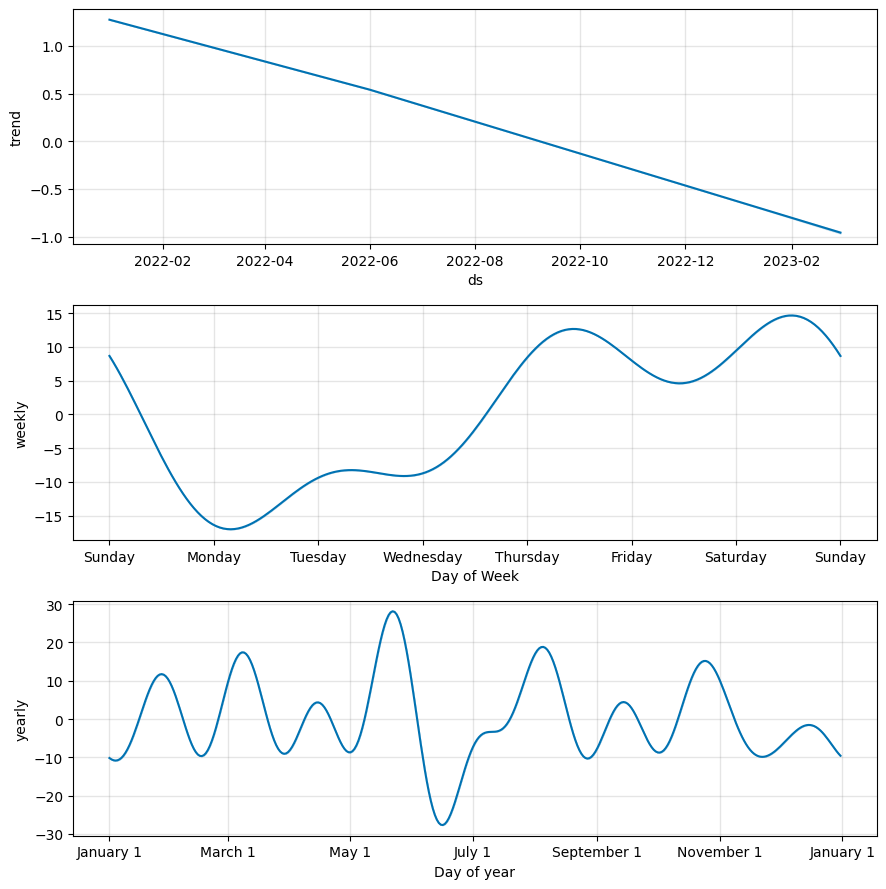

In [20]:
dates = pd.date_range(start='2022-01-01', end='2022-12-31', freq='D')
np.random.seed(42)

# สร้างข้อมูลรายรับรายจ่ายพร้อมความแปรปรวนตามฤดูกาล
revenues = []
expenses = []
categories = ['Staff', 'Utilities', 'Maintenance', 'Marketing', 'Food', 'Supplies']

for date in dates:
    # เพิ่มรายได้ช่วง high season (พ.ย.-ก.พ.) และวันหยุดสุดสัปดาห์
    season_factor = 1.5 if date.month in [11, 12, 1, 2] else 1.0
    weekend_factor = 1.3 if date.dayofweek >= 5 else 1.0
    base_revenue = 100000 * season_factor * weekend_factor
    
    # เพิ่มสุ่มเล็กน้อย
    revenue = base_revenue * (0.9 + 0.2 * np.random.random())
    revenues.append(revenue)
    
    # สร้างรายจ่ายปกติ + รายจ่ายผิดปกติในบางช่วง
    normal_expense = revenue * (0.6 + 0.1 * np.random.random())
    
    # เพิ่มรายจ่ายผิดปกติในบางเดือน
    if (date.month == 7 and date.day < 15) or (date.month == 3 and date.day > 20):
        normal_expense *= 1.4  # เพิ่มรายจ่ายผิดปกติ 40%
    
    expenses.append(normal_expense)

# สร้างข้อมูลรายจ่ายแยกตามหมวดหมู่
category_data = []
for i, date in enumerate(dates):
    total_expense = expenses[i]
    # แบ่งรายจ่ายตามหมวดหมู่
    if date.month in [11, 12, 1, 2]:  # High season
        weights = [0.4, 0.15, 0.1, 0.2, 0.1, 0.05]  # Staff, Utilities, Maintenance, Marketing, Food, Supplies
    else:
        weights = [0.35, 0.2, 0.15, 0.1, 0.15, 0.05]
    
    # สุ่มปรับเล็กน้อย
    weights = [w * (0.9 + 0.2 * np.random.random()) for w in weights]
    # ปรับให้รวมเป็น 1
    weights = [w / sum(weights) for w in weights]
    
    for j, category in enumerate(categories):
        category_expense = total_expense * weights[j]
        category_data.append({
            'date': date,
            'expense_category': category,
            'expense': category_expense,
            'year': date.year,
            'month': date.month
        })

# สร้าง DataFrame
sample_df = pd.DataFrame({
    'date': dates,
    'revenue': revenues,
    'expense': expenses
})

category_df = pd.DataFrame(category_data)

# วิเคราะห์ข้อมูล
sample_df = calculate_expense_ratio(sample_df)
monthly_data = analyze_expenses_by_time(sample_df)
monthly_data_with_anomalies = detect_anomalies(monthly_data)
forecast_data, components = forecast_with_prophet(monthly_data)
monthly_category_data = analyze_expenses_by_category(category_df)

# สร้างแดชบอร์ด
fig1, fig2, fig3, fig4 = create_expense_dashboard(
    monthly_data, 
    monthly_category_data,
    monthly_data_with_anomalies,
    forecast_data
)

# สร้างรายงานช่วงเวลาที่มีรายจ่ายผิดปกติ
report = generate_expense_report(monthly_data_with_anomalies, monthly_category_data)

# แสดงผลรายงาน
print("== ช่วงเวลาที่มีรายจ่ายสูงเกินไป ==")
for period in report:
    print(f"\nช่วงเวลา: {period['period']}")
    print(f"อัตราส่วนรายจ่ายต่อรายได้: {period['expense_ratio']:.2f}")
    print(f"รายจ่ายรวม: {period['total_expense']:,.2f} บาท")
    print(f"รายได้รวม: {period['total_revenue']:,.2f} บาท")
    print("หมวดหมู่รายจ่ายสูงสุด:")
    for i, category in enumerate(period['top_expense_categories']):
        print(f"  - {category}: {period['category_amounts'][i]:,.2f} บาท")

In [19]:
sample_df

,date,revenue,expense,expense_ratio,year,month,week,day_of_week
0,2022-01-01,190107.064635,132137.989391,0.695071,2022,1,52,5
1,2022-01-02,204047.763731,134644.150732,0.659866,2022,1,52,6
2,2022-01-03,139680.559213,85987.275711,0.615599,2022,1,1,0
3,2022-01-04,136742.508365,93889.814905,0.686618,2022,1,1,1
4,2022-01-05,153033.450352,102655.949179,0.670807,2022,1,1,2
...,...,...,...,...,...,...,...,...
360,2022-12-27,163150.213705,100846.949570,0.618123,2022,12,52,1
361,2022-12-28,136994.888021,92349.906849,0.674112,2022,12,52,2
362,2022-12-29,152234.193395,104156.028518,0.684183,2022,12,52,3
363,2022-12-30,139193.171299,94585.480696,0.679527,2022,12,52,4
